#### A類不確定度

##### 抽撲克牌

In [16]:
import random
# number of sample
num_samples = 10

# Generate a random integer
random_int = random.randint(1, 13)
print("Random Integer:", random_int)


# Generate a list of random integers 
poker_list = [random.randint(1, 13) for _ in range(num_samples)]
print("抽牌:", poker_list)

# Get the mean of the list
result = sum(poker_list) / len(poker_list)
print("平均:", result)
print(f"誤差:{result-7:.1f}" )


Random Integer: 9
抽牌: [4, 4, 7, 2, 10, 13, 7, 12, 9, 10]
平均: 7.8
誤差:0.8


##### 抽好多次畫統計圖

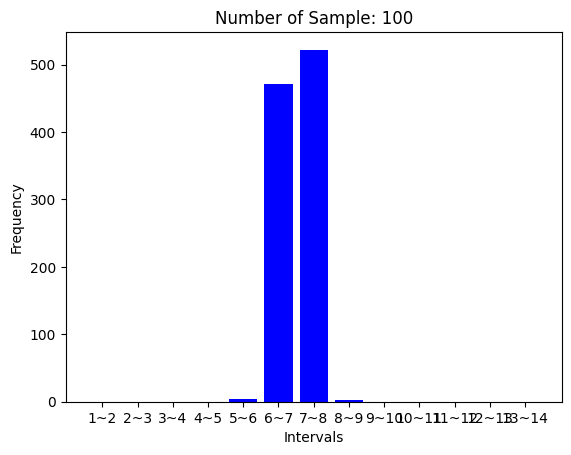

[7.08, 7.21, 7.36, 7.1, 6.7, 7.34, 6.83, 7.18, 6.6, 7.09, 6.38, 6.44, 7.38, 7.35, 6.27, 6.76, 7.16, 7.48, 6.99, 6.56, 7.27, 6.58, 6.62, 6.84, 6.76, 6.99, 6.79, 7.22, 7.21, 7.86, 6.38, 7.17, 7.13, 7.4, 7.8, 6.53, 6.87, 7.37, 7.63, 6.53, 6.55, 7.15, 6.58, 7.25, 6.99, 7.21, 7.33, 7.41, 7.11, 7.12, 7.48, 7.3, 7.17, 6.91, 7.05, 7.63, 6.47, 7.56, 7.45, 6.81, 7.33, 6.37, 7.29, 6.85, 7.21, 5.96, 6.63, 6.09, 6.72, 6.84, 7.13, 7.29, 6.97, 7.2, 6.69, 7.07, 7.47, 6.68, 6.54, 6.86, 7.13, 6.65, 7.12, 6.89, 6.86, 7.76, 7.44, 6.97, 6.79, 7.05, 6.51, 6.29, 7.09, 7.04, 7.07, 6.51, 7.12, 7.51, 6.92, 7.3, 7.38, 6.76, 6.75, 6.68, 6.77, 6.81, 6.9, 6.79, 6.96, 6.71, 7.24, 7.08, 6.65, 6.41, 7.3, 6.95, 7.81, 6.94, 7.0, 6.67, 6.91, 7.43, 6.77, 6.48, 5.89, 7.53, 6.96, 7.01, 7.0, 7.06, 6.89, 7.27, 6.37, 7.11, 5.97, 6.98, 7.55, 7.02, 7.18, 7.28, 7.75, 7.29, 6.88, 6.78, 6.98, 6.63, 7.16, 7.17, 7.19, 6.48, 6.52, 7.22, 7.42, 7.19, 7.02, 6.84, 6.79, 6.41, 7.73, 7.12, 7.23, 7.09, 6.81, 7.12, 6.18, 6.79, 7.55, 7.65, 6.9

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# number of sample
num_samples = 100

# Poker Mean List
poker_mean_list = []
for i in range(1000):
    # Generate a list of random integers 
    poker_list = [random.randint(1, 13) for _ in range(num_samples)]
    
    # Get the mean of the list
    mean = sum(poker_list) / len(poker_list)
    
    # Append the mean to the list
    poker_mean_list.append(mean)

# Given list of numbers
data = poker_mean_list

# Define the intervals
intervals = np.arange(1, 14, 1)  # This represents [1~2, 2~3, 3~4]

# Count the occurrences of each number within intervals
histogram_data = [sum(1 for num in data if interval <= num < interval + 1) for interval in intervals]

# Define the labels for x-axis
interval_labels = [f"{interval}~{interval+1}" for interval in intervals]

# Create the histogram plot
plt.bar(interval_labels, histogram_data, color='blue')

# Add labels and title
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.title(f'Number of Sample: {num_samples}')

# save the plot
plt.savefig(f'a_sample_{num_samples}.png')

# Show the plot
plt.show()
print(poker_mean_list)

##### 不確定度有用嗎？

In [68]:
from playsound import playsound

# Generate a list of random integers 
num_samples = 5
poker_list = [random.randint(1, 13) for _ in range(num_samples)]
mean = sum(poker_list) / len(poker_list)
standard_deviation = np.std(poker_list, ddof=1)
a_uncertainty = standard_deviation / np.sqrt(num_samples)
print(poker_list)
print(f'平均值: {mean}')
print(f'A類不確定度: {a_uncertainty:.1f}')
print(f'真值範圍: {mean-a_uncertainty:.1f}~{mean+a_uncertainty:.1f}')
if(7>mean-a_uncertainty and 7<mean+a_uncertainty):
    print('對了！')
else:
    print('錯了...')

[7, 12, 12, 9, 9]
平均值: 9.8
A類不確定度: 1.0
真值範圍: 8.8~10.8
錯了...


##### 不確定度有用嗎？統計正確率

In [67]:
import random
import numpy as np

# number of experiment
exp_num = 1000
# number of sample
num_samples = 100
# times of uncertainty
times_unc = 2
# error counter
error_counter = 0
# real value
real_value = 7
for _ in range(exp_num):
    poker_list = [random.randint(1, 13) for _ in range(num_samples)]
    mean = sum(poker_list) / len(poker_list)
    standard_deviation = np.std(poker_list, ddof=1)
    a_uncertainty = standard_deviation / np.sqrt(num_samples)
    if(real_value<mean-times_unc*a_uncertainty or real_value>mean+times_unc*a_uncertainty):
        error_counter+=1
print(f"正確率: {100-error_counter/exp_num*100:.2f}%")



正確率: 95.40%
